# Decision Tree Code
Let's try and implement a decision tree :We will be working on Titanic Dataset: we will try to predict if a passenger is going to survive or not.

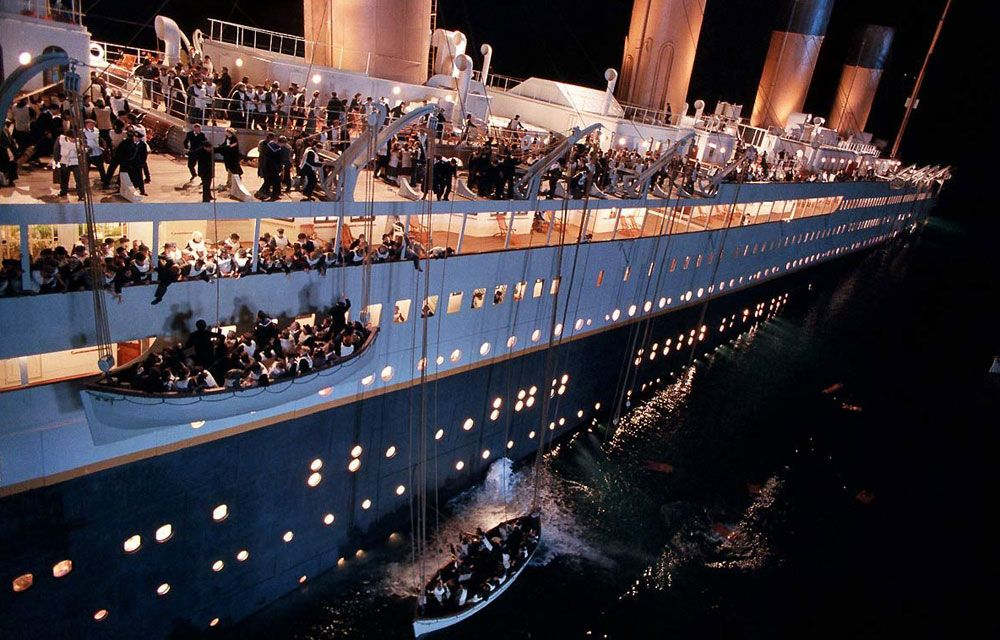

In [3]:
#Importing our dataset from csv file
import pandas as pd
dataset=pd.read_csv("titanic-passengers.csv", sep=";")
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [12]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
#applying tree algorithm
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


In [13]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.77      0.79       108
           1       0.68      0.75      0.71        71

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.76      0.76       179



<Axes: >

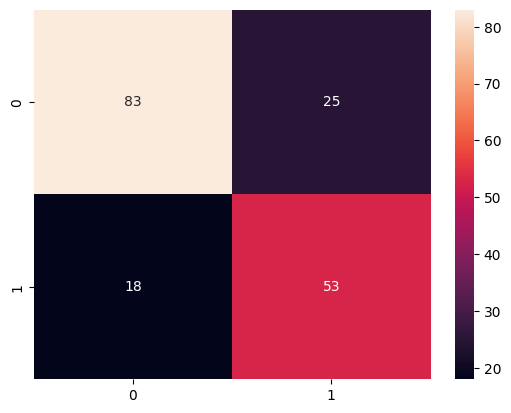

In [14]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")


In [15]:

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate the number of correct and incorrect predictions
correct_predictions = cm[0][0] + cm[1][1]
incorrect_predictions = cm[0][1] + cm[1][0]

# Print the number of correct and incorrect predictions
print("Correct predictions:", correct_predictions)
print("Incorrect predictions:", incorrect_predictions)

# Calculate the sensitivity and specificity of the model
sensitivity = cm[0][0] / (cm[0][0] + cm[0][1])
specificity = cm[1][1] / (cm[1][1] + cm[1][0])

# Print the sensitivity and specificity
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Calculate the positive predictive value and negative predictive value of the model
positive_predictive_value = cm[0][0] / (cm[0][0] + cm[1][0])
negative_predictive_value = cm[1][1] / (cm[1][1] + cm[0][1])

# Print the positive predictive value and negative predictive value
print("Positive predictive value:", positive_predictive_value)
print("Negative predictive value:", negative_predictive_value)


Accuracy: 0.7597765363128491
Correct predictions: 136
Incorrect predictions: 43
Sensitivity: 0.7685185185185185
Specificity: 0.7464788732394366
Positive predictive value: 0.8217821782178217
Negative predictive value: 0.6794871794871795


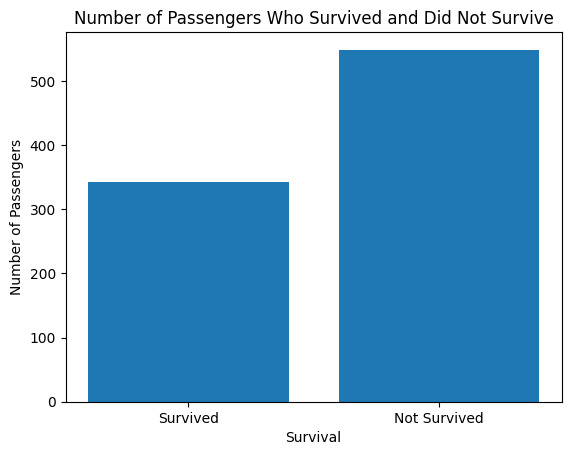

In [16]:

import matplotlib.pyplot as plt
# Create a bar chart to visualize the number of passengers who survived and did not survive
survived_passengers = data[data["Survived"] == 1]["Survived"].count()
not_survived_passengers = data[data["Survived"] == 0]["Survived"].count()

labels = ["Survived", "Not Survived"]
values = [survived_passengers, not_survived_passengers]

plt.bar(labels, values)
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Who Survived and Did Not Survive")
plt.show()


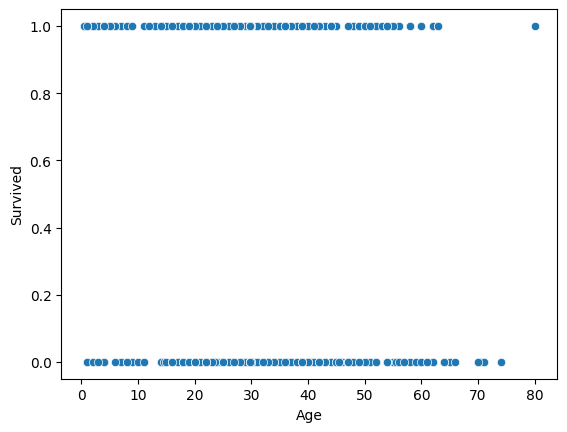

In [18]:

import matplotlib.pyplot as plt
sns.scatterplot(x="Age", y="Survived", data=data)
plt.show()


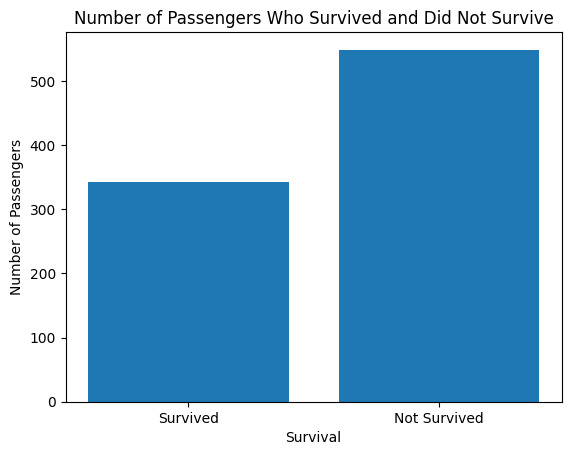

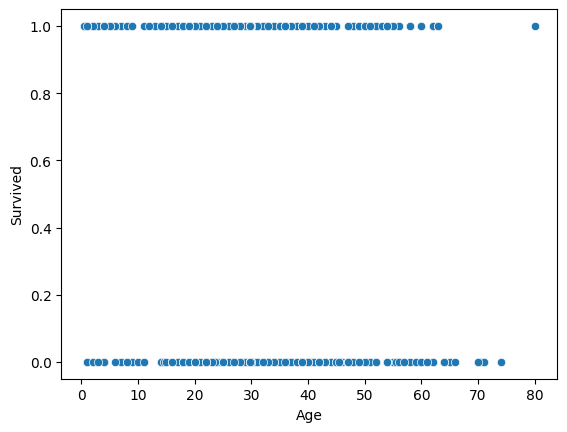

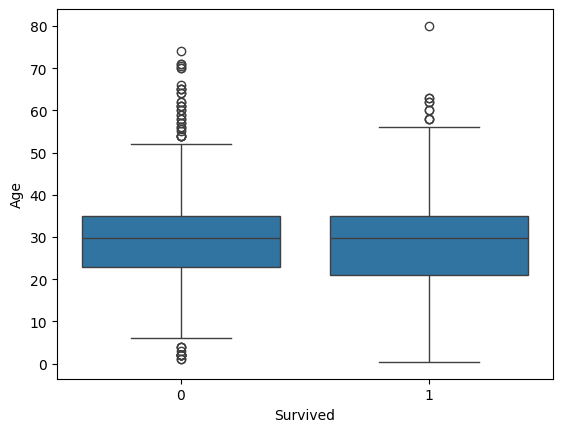

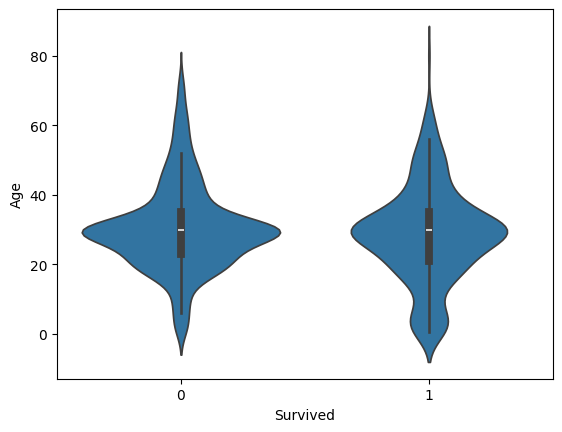

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart of the number of passengers who survived and did not survive
survived_passengers = data[data["Survived"] == 1]["Survived"].count()
not_survived_passengers = data[data["Survived"] == 0]["Survived"].count()

labels = ["Survived", "Not Survived"]
values = [survived_passengers, not_survived_passengers]

plt.bar(labels, values)
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Who Survived and Did Not Survive")
plt.show()

# Create a scatter plot of age vs. survival
sns.scatterplot(x="Age", y="Survived", data=data)
plt.show()

# Create a box plot of age vs. survival
sns.boxplot(x="Survived", y="Age", data=data)
plt.show()

# Create a violin plot of age vs. survival
sns.violinplot(x="Survived", y="Age", data=data)
plt.show()


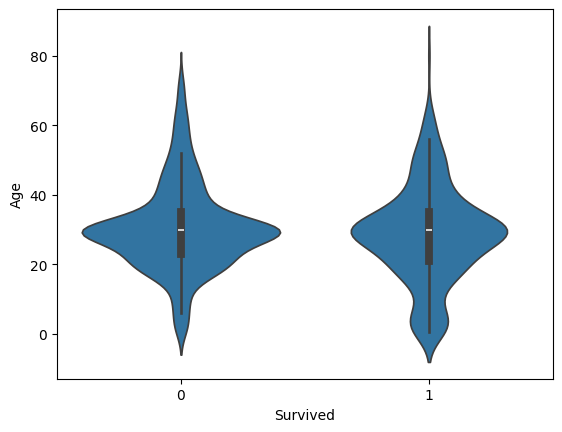

In [20]:

# Analyze the violin plot
# The violin plot shows the distribution of age for passengers who survived and did not survive.
# The plot shows that passengers who survived were generally younger than passengers who did not survive.
# The plot also shows that there were more outliers in the age distribution of passengers who did not survive.